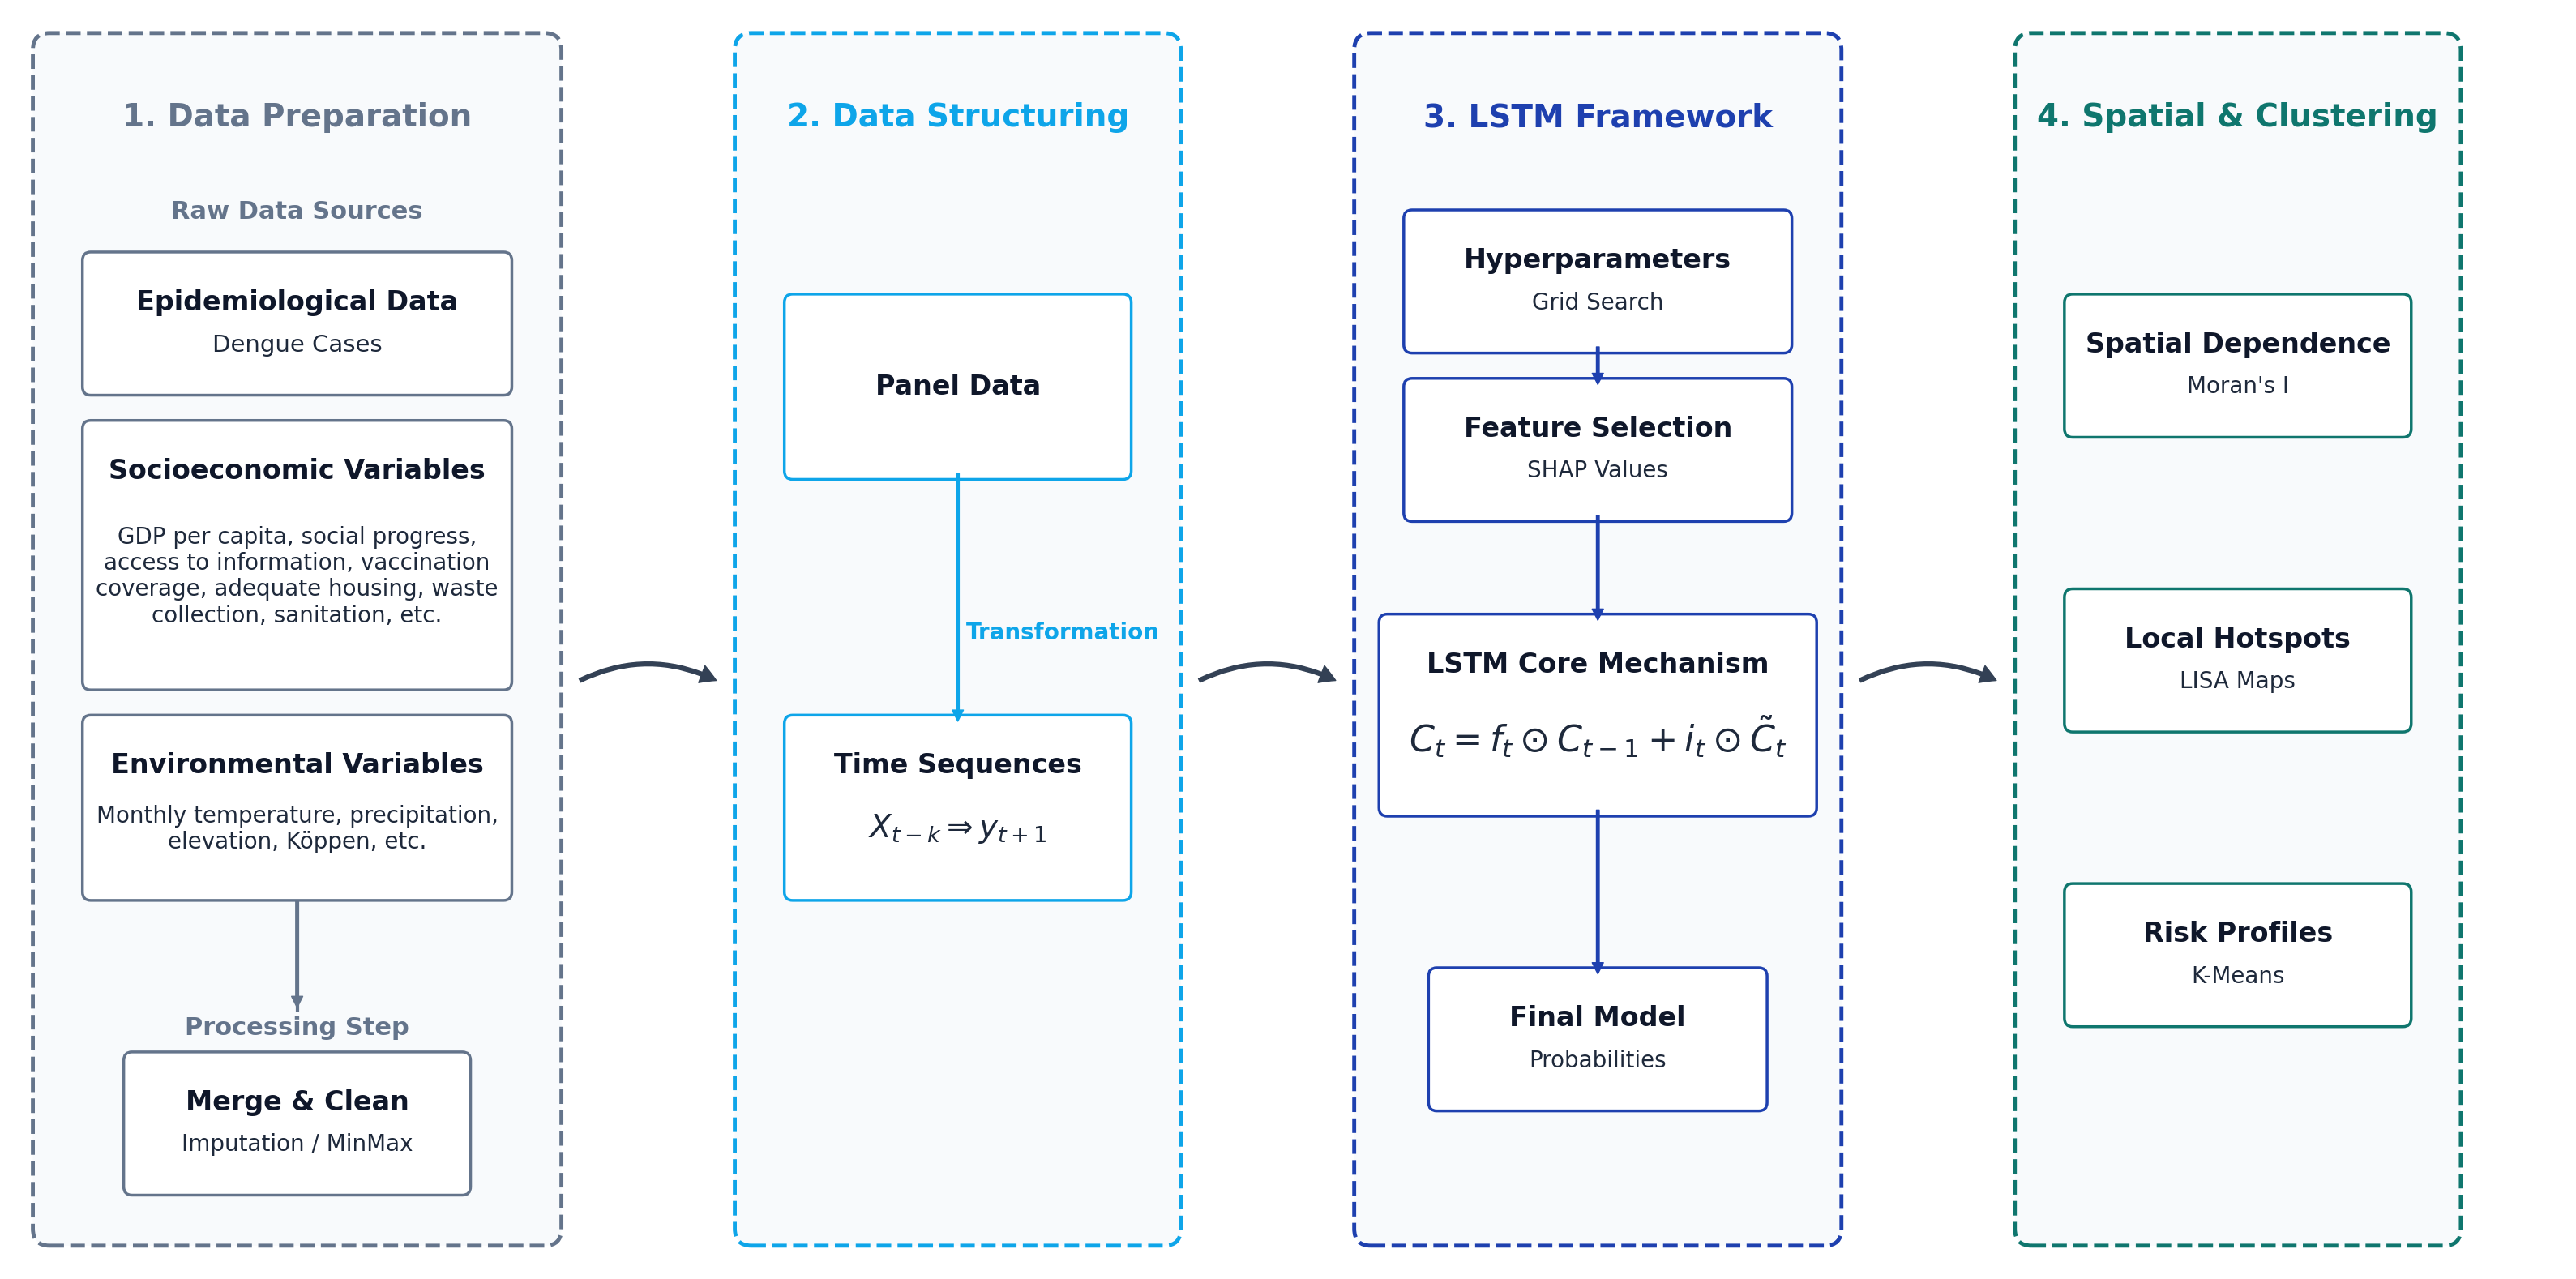

In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def flow_epidemiological_predictions():
    fig, ax = plt.subplots(figsize=(32, 16))
    ax.set_xlim(0, 31)
    ax.set_ylim(0, 15)
    ax.axis('off')

    colors = {
        'bg_container': '#f8fafc',
        'border_1': '#64748b',
        'border_2': '#0ea5e9',
        'border_3': '#1e40af',
        'border_4': '#0f766e',
        'text_main': '#0f172a',
        'text_sub': '#1e293b',
        'arrow_big': '#334155',
        'label_group': '#64748b'
    }

    def draw_container(x, y, w, h, title, color):
        box = patches.FancyBboxPatch((x, y), w, h, boxstyle="round,pad=0.2",
                                     linewidth=3.5, edgecolor=color, facecolor=colors['bg_container'],
                                     linestyle='--', zorder=0)
        ax.add_patch(box)
        ax.text(x + w/2, y + h - 0.8, title, ha='center', va='center',
                fontsize=28, fontweight='bold', color=color, zorder=10)
        return {'r': x+w, 'l': x, 'cy': y + h/2}

    def draw_node(x, y, w, h, title, subtext, border_c, sub_font_size=21):
        box = patches.FancyBboxPatch((x, y), w, h, boxstyle="round,pad=0.1",
                                     linewidth=2.5, edgecolor=border_c, facecolor='white', zorder=2)
        ax.add_patch(box)
        cy = y + h/2

        if subtext:
            ax.text(x + w/2, y + h - 0.5, title, ha='center', va='center',
                    fontsize=24, fontweight='bold', color=colors['text_main'], zorder=3)
            text_center_y = y + (h - 0.5) / 2
            ax.text(x + w/2, text_center_y, subtext, ha='center', va='center',
                    fontsize=sub_font_size, fontweight='normal', color=colors['text_sub'], zorder=3)
        else:
            ax.text(x + w/2, cy, title, ha='center', va='center',
                    fontsize=24, fontweight='bold', color=colors['text_main'], zorder=3)
        return {'cx': x+w/2, 'cy': cy, 'b': y, 't': y+h, 'r': x+w, 'l': x}

    def draw_big_arrow(p1, p2, color):
        arrow = patches.FancyArrowPatch(p1, p2, connectionstyle="arc3,rad=-0.25",
                                        color=color,
                                        arrowstyle="Simple, tail_width=3.5, head_width=16, head_length=14",
                                        zorder=5)
        ax.add_patch(arrow)

    def draw_internal_arrow(p1, p2, color, z_order=5):
        arrow = patches.FancyArrowPatch(p1, p2, connectionstyle="arc3,rad=0",
                                        color=color,
                                        arrowstyle="Simple, tail_width=2.5, head_width=10, head_length=10",
                                        zorder=z_order)
        ax.add_patch(arrow)

    # ==========================================
    # 1. DATA PREPARATION
    # ==========================================
    c1 = draw_container(0.5, 0.5, 6.0, 14.0, "1. Data Preparation", colors['border_1'])
    ax.text(3.5, 12.5, "Raw Data Sources", ha='center', fontsize=22, fontweight='bold', color=colors['label_group'])
    n1_epi = draw_node(1.0, 10.5, 5.0, 1.5, "Epidemiological Data", "Dengue Cases", colors['border_1'])

    soc_text = (
        "GDP per capita, social progress,\n"
        "access to information, vaccination\n"
        "coverage, adequate housing, waste\n"
        "collection, sanitation, etc."
    )
    n1_soc = draw_node(1.0, 7.0, 5.0, 3.0, "Socioeconomic Variables", soc_text, colors['border_1'], sub_font_size=20)

    env_text = "Monthly temperature, precipitation,\nelevation, Köppen, etc."
    n1_env = draw_node(1.0, 4.5, 5.0, 2.0, "Environmental Variables", env_text, colors['border_1'], sub_font_size=20)
    n1_mrg = draw_node(1.5, 1.0, 4.0, 1.5, "Merge & Clean", "Imputation / MinMax", colors['border_1'], sub_font_size=20)

    ax.text(3.5, 2.8, "Processing Step", ha='center', fontsize=22, fontweight='bold', color=colors['label_group'], zorder=10)
    arrow_end_y = 3.1
    ax.plot([n1_env['cx'], n1_env['cx']], [n1_env['b'], arrow_end_y], color=colors['border_1'], lw=3, zorder=1)
    draw_internal_arrow((n1_env['cx'], n1_env['b']), (n1_env['cx'], arrow_end_y), colors['border_1'], z_order=1)

    # ==========================================
    # 2. DATA STRUCTURING
    # ==========================================
    c2 = draw_container(9.0, 0.5, 5.0, 14.0, "2. Data Structuring", colors['border_2'])
    n2_pan = draw_node(9.5, 9.5, 4.0, 2.0, "Panel Data", None, colors['border_2'])
    n2_seq = draw_node(9.5, 4.5, 4.0, 2.0, "Time Sequences", r"$X_{t-k} \Rightarrow y_{t+1}$", colors['border_2'], sub_font_size=28)
    draw_internal_arrow((n2_pan['cx'], n2_pan['b']), (n2_seq['cx'], n2_seq['t']), colors['border_2'])
    ax.text(n2_pan['cx'] + 0.1, 7.5, "Transformation", fontsize=20, color=colors['border_2'], ha='left', fontweight='bold')

    # ==========================================
    # 3. LSTM FRAMEWORK
    # ==========================================
    c3 = draw_container(16.5, 0.5, 5.5, 14.0, "3. LSTM Framework", colors['border_3'])
    n3_hyp = draw_node(17.0, 11.0, 4.5, 1.5, "Hyperparameters", "Grid Search", colors['border_3'], sub_font_size=20)
    n3_fea = draw_node(17.0, 9.0, 4.5, 1.5, "Feature Selection", "SHAP Values", colors['border_3'], sub_font_size=20)
    n3_cor = draw_node(16.7, 5.5, 5.1, 2.2, "LSTM Core Mechanism", r"$C_t = f_t \odot C_{t-1} + i_t \odot \tilde{C}_t$", colors['border_3'], sub_font_size=32)
    n3_fin = draw_node(17.3, 2.0, 3.9, 1.5, "Final Model", "Probabilities", colors['border_3'], sub_font_size=20)

    draw_internal_arrow((n3_hyp['cx'], n3_hyp['b']), (n3_fea['cx'], n3_fea['t']), colors['border_3'])
    draw_internal_arrow((n3_fea['cx'], n3_fea['b']), (n3_cor['cx'], n3_cor['t']), colors['border_3'])
    draw_internal_arrow((n3_cor['cx'], n3_cor['b']), (n3_fin['cx'], n3_fin['t']), colors['border_3'])

    # ==========================================
    # 4. SPATIAL & CLUSTERING
    # ==========================================
    c4 = draw_container(24.5, 0.5, 5.0, 14.0, "4. Spatial & Clustering", colors['border_4'])
    n4_glo = draw_node(25.0, 10.0, 4.0, 1.5, "Spatial Dependence", "Moran's I", colors['border_4'], sub_font_size=20)
    n4_loc = draw_node(25.0, 6.5, 4.0, 1.5, "Local Hotspots", "LISA Maps", colors['border_4'], sub_font_size=20)
    n4_clu = draw_node(25.0, 3.0, 4.0, 1.5, "Risk Profiles", "K-Means", colors['border_4'], sub_font_size=20)

    conn_y = 7.0
    gap = 0.4
    draw_big_arrow((c1['r'] + gap, conn_y), (c2['l'] - gap, conn_y), colors['arrow_big'])
    draw_big_arrow((c2['r'] + gap, conn_y), (c3['l'] - gap, conn_y), colors['arrow_big'])
    draw_big_arrow((c3['r'] + gap, conn_y), (c4['l'] - gap, conn_y), colors['arrow_big'])

    plt.tight_layout(pad=1.5)
    plt.show()

flow_epidemiological_predictions()

In [3]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def flow_epidemiological_predictions():
    fig, ax = plt.subplots(figsize=(32, 16))
    ax.set_xlim(0, 31)
    ax.set_ylim(0, 15)
    ax.axis('off')

    colors = {
        'bg_container': '#f8fafc',
        'border_1': '#64748b',
        'border_2': '#0ea5e9',
        'border_3': '#1e40af',
        'border_4': '#0f766e',
        'text_main': '#0f172a',
        'text_sub': '#1e293b',
        'arrow_big': '#334155',
        'label_group': '#64748b'
    }

    def draw_container(x, y, w, h, title, color):
        box = patches.FancyBboxPatch((x, y), w, h, boxstyle="round,pad=0.2",
                                     linewidth=3.5, edgecolor=color, facecolor=colors['bg_container'],
                                     linestyle='--', zorder=0)
        ax.add_patch(box)
        ax.text(x + w/2, y + h - 0.8, title, ha='center', va='center',
                fontsize=28, fontweight='bold', color=color, zorder=10)
        return {'r': x+w, 'l': x, 'cy': y + h/2}

    def draw_node(x, y, w, h, title, subtext, border_c, sub_font_size=21):
        box = patches.FancyBboxPatch((x, y), w, h, boxstyle="round,pad=0.1",
                                     linewidth=2.5, edgecolor=border_c, facecolor='white', zorder=2)
        ax.add_patch(box)
        cy = y + h/2

        if subtext:
            ax.text(x + w/2, y + h - 0.5, title, ha='center', va='center',
                    fontsize=24, fontweight='bold', color=colors['text_main'], zorder=3)
            text_center_y = y + (h - 0.5) / 2
            ax.text(x + w/2, text_center_y, subtext, ha='center', va='center',
                    fontsize=sub_font_size, fontweight='normal', color=colors['text_sub'], zorder=3)
        else:
            ax.text(x + w/2, cy, title, ha='center', va='center',
                    fontsize=24, fontweight='bold', color=colors['text_main'], zorder=3)
        return {'cx': x+w/2, 'cy': cy, 'b': y, 't': y+h, 'r': x+w, 'l': x}

    def draw_big_arrow(p1, p2, color):
        arrow = patches.FancyArrowPatch(p1, p2, connectionstyle="arc3,rad=-0.25",
                                        color=color,
                                        arrowstyle="Simple, tail_width=3.5, head_width=16, head_length=14",
                                        zorder=5)
        ax.add_patch(arrow)

    def draw_internal_arrow(p1, p2, color, z_order=5):
        arrow = patches.FancyArrowPatch(p1, p2, connectionstyle="arc3,rad=0",
                                        color=color,
                                        arrowstyle="Simple, tail_width=2.5, head_width=10, head_length=10",
                                        zorder=z_order)
        ax.add_patch(arrow)

    # ==========================================
    # 1. DATA PREPARATION
    # ==========================================
    c1 = draw_container(0.5, 0.5, 6.0, 14.0, "1. Data Preparation", colors['border_1'])
    ax.text(3.5, 12.2, "Raw Data Sources", ha='center', fontsize=22, fontweight='bold', color=colors['label_group'])
    n1_epi = draw_node(1.0, 10.5, 5.0, 1.5, "Epidemiological Data", "Dengue Cases", colors['border_1'])

    soc_text = (
        "GDP per capita, social progress,\n"
        "access to information, vaccination\n"
        "coverage, adequate housing, waste\n"
        "collection, sanitation, etc."
    )
    n1_soc = draw_node(1.0, 7.0, 5.0, 3.0, "Socioeconomic Variables", soc_text, colors['border_1'], sub_font_size=20)

    env_text = "Monthly temperature, precipitation,\nelevation, Köppen, etc."
    n1_env = draw_node(1.0, 4.5, 5.0, 2.0, "Environmental Variables", env_text, colors['border_1'], sub_font_size=20)
    n1_mrg = draw_node(1.5, 1.0, 4.0, 1.5, "Merge & Clean", "Imputation / MinMax", colors['border_1'], sub_font_size=20)

    ax.text(3.5, 2.8, "Processing Step", ha='center', fontsize=22, fontweight='bold', color=colors['label_group'], zorder=10)
    arrow_end_y = 3.4
    ax.plot([n1_env['cx'], n1_env['cx']], [n1_env['b'], arrow_end_y], color=colors['border_1'], lw=3, zorder=1)
    draw_internal_arrow((n1_env['cx'], n1_env['b']), (n1_env['cx'], arrow_end_y), colors['border_1'], z_order=1)

    # ==========================================
    # 2. DATA STRUCTURING
    # ==========================================
    c2 = draw_container(9.0, 0.5, 5.0, 14.0, "2. Data Structuring", colors['border_2'])
    n2_pan = draw_node(9.5, 9.5, 4.0, 2.0, "Panel Data", None, colors['border_2'])
    n2_seq = draw_node(9.5, 4.5, 4.0, 2.0, "Time Sequences", r"$X_{t-k} \Rightarrow y_{t+1}$", colors['border_2'], sub_font_size=28)
    draw_internal_arrow((n2_pan['cx'], n2_pan['b']), (n2_seq['cx'], n2_seq['t']), colors['border_2'])
    ax.text(n2_pan['cx'] + 0.1, 7.5, "Transformation", fontsize=20, color=colors['border_2'], ha='left', fontweight='bold')

    # ==========================================
    # 3. LSTM FRAMEWORK
    # ==========================================
    c3 = draw_container(16.5, 0.5, 5.5, 14.0, "3. LSTM Framework", colors['border_3'])
    n3_hyp = draw_node(17.0, 11.0, 4.5, 1.5, "Hyperparameters", "Grid Search", colors['border_3'], sub_font_size=20)
    n3_fea = draw_node(17.0, 9.0, 4.5, 1.5, "Feature Selection", "SHAP Values", colors['border_3'], sub_font_size=20)
    n3_cor = draw_node(16.7, 5.5, 5.1, 2.2, "LSTM Core Mechanism", r"$C_t = f_t \odot C_{t-1} + i_t \odot \tilde{C}_t$", colors['border_3'], sub_font_size=32)
    n3_fin = draw_node(17.3, 2.0, 3.9, 1.5, "Final Model", "Probabilities", colors['border_3'], sub_font_size=20)

    draw_internal_arrow((n3_hyp['cx'], n3_hyp['b']), (n3_fea['cx'], n3_fea['t']), colors['border_3'])
    draw_internal_arrow((n3_fea['cx'], n3_fea['b']), (n3_cor['cx'], n3_cor['t']), colors['border_3'])
    draw_internal_arrow((n3_cor['cx'], n3_cor['b']), (n3_fin['cx'], n3_fin['t']), colors['border_3'])

    # ==========================================
    # 4. SPATIAL & CLUSTERING
    # ==========================================
    c4 = draw_container(24.5, 0.5, 5.0, 14.0, "4. Spatial & Clustering", colors['border_4'])
    n4_glo = draw_node(25.0, 9.5, 4.0, 1.5, "Spatial Dependence", "Moran's I", colors['border_4'], sub_font_size=20)
    n4_loc = draw_node(25.0, 6.0, 4.0, 1.5, "Local Hotspots", "LISA Maps", colors['border_4'], sub_font_size=20)
    n4_clu = draw_node(25.0, 2.5, 4.0, 1.5, "Risk Profiles", "K-Means", colors['border_4'], sub_font_size=20)

    conn_y = 7.0
    gap = 0.4
    draw_big_arrow((c1['r'] + gap, conn_y), (c2['l'] - gap, conn_y), colors['arrow_big'])
    draw_big_arrow((c2['r'] + gap, conn_y), (c3['l'] - gap, conn_y), colors['arrow_big'])
    draw_big_arrow((c3['r'] + gap, conn_y), (c4['l'] - gap, conn_y), colors['arrow_big'])

    # ==========================================
    # SAVE OUTPUT
    # ==========================================
    plt.tight_layout(pad=1.5)
    plt.savefig("methodology_diagram_final.pdf", format='pdf', bbox_inches='tight', pad_inches=0.05)
    plt.close()

flow_epidemiological_predictions()